In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dataset = pd.read_csv("/content/drive/MyDrive/abalone.data")

Mounted at /content/drive


In [108]:
dataset

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [109]:
data= pd.DataFrame(dataset, columns = dataset.columns)

In [110]:
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [111]:
data.isna().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
  data[i]=le.fit_transform(data[i])

In [113]:
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7
...,...,...,...,...,...,...,...,...,...
4171,0,88,73,32,1289,698,475,442,10
4172,2,93,71,26,1411,832,426,463,9
4173,2,95,78,40,1727,994,571,550,8
4174,0,100,80,29,1610,1005,518,530,9


In [123]:
X=data.drop(['0.15','M','0.095','0.365','15'],axis=1)
X.head()

,0.455,0.514,0.2245,0.101
0,45,285,178,94
1,81,962,480,280
2,63,718,400,225
3,41,253,159,76
4,60,463,254,152


In [124]:
y = data['0.15']
y.head()

0    113
1    374
2    273
3     87
4    207
Name: 0.15, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (4,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                320       
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [129]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 1s 4ms/step - loss: 8111.5645 - mse: 8111.5645 - val_loss: 3411.1562 - val_mse: 3411.1562
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 3083.4004 - mse: 3083.4004 - val_loss: 3566.9558 - val_mse: 3566.9558
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 2882.9119 - mse: 2882.9119 - val_loss: 5326.4268 - val_mse: 5326.4268
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 2813.2737 - mse: 2813.2737 - val_loss: 4583.7222 - val_mse: 4583.7222
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 2651.9648 - mse: 2651.9648 - val_loss: 2000.1534 - val_mse: 2000.1534
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 2646.2834 - mse: 2646.2834 - val_loss: 1983.3159 - val_mse: 1983.3159
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 2644.2119 - mse: 2644.2119 - val_loss: 1938.0481 - val_mse: 1938.0481

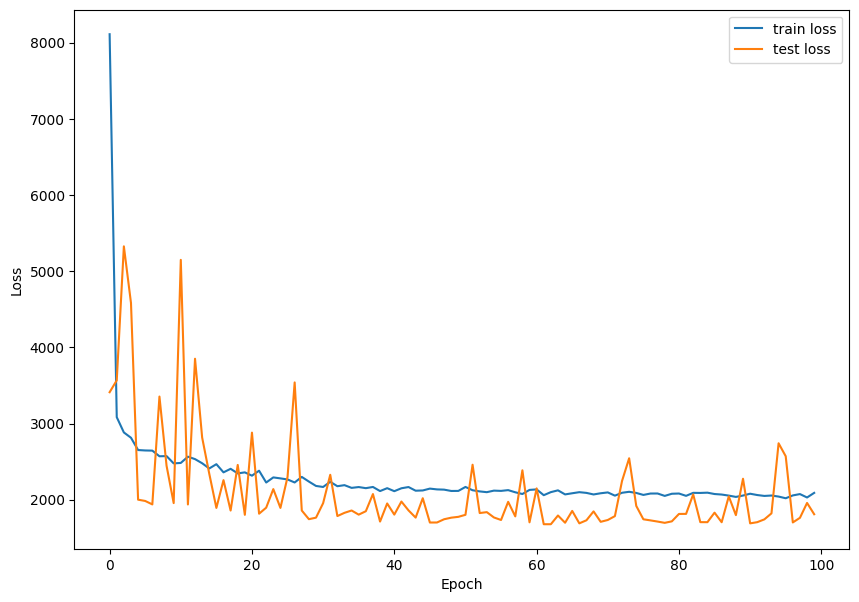

In [130]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

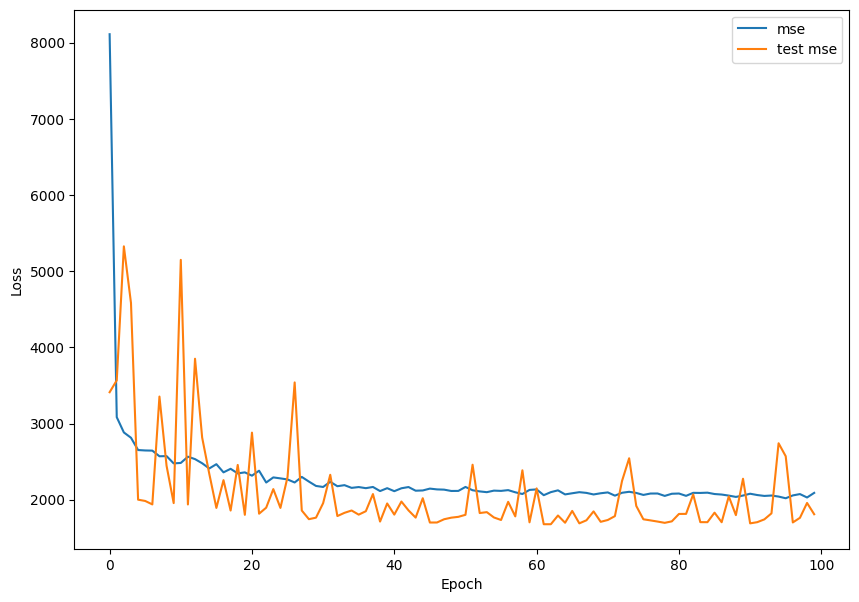

In [131]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [132]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 1808.9432 - mse: 1808.9432


[1808.9432373046875, 1808.9432373046875]